In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# basic ml import
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [3]:
data_url = "https://raw.githubusercontent.com/digipodium/Datasets/main/carsspeed.csv"
df = pd.read_csv(data_url, index_col=0)
df.head()

,speed,dist
1,4,2
2,4,10
3,7,4
4,7,22
5,8,16


In [4]:
df.shape

(50, 2)

<AxesSubplot:xlabel='speed', ylabel='dist'>

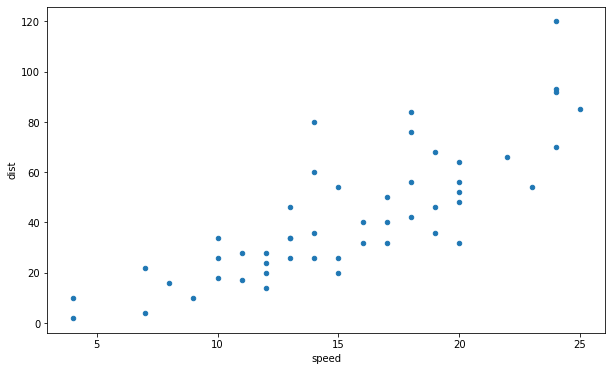

In [5]:
df.plot(x='speed',y='dist',kind='scatter',figsize=(10,6))

In [6]:
# step 2
X = df[['speed']] # 2d vector
y = df['dist'] # 1d

In [7]:
# step 3
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=.3,random_state=1)

In [8]:
# step 4
from sklearn.linear_model import LinearRegression
reg = LinearRegression() # no parameter required
reg.fit(xtrain,ytrain) # training the algo

LinearRegression()

In [9]:
# step 5
score = reg.score(xtest,ytest) * 100
print(f'the score is {score}% for our model')

the score is 55.483326811320886% for our model


In [10]:
df['prediction']=reg.predict(X)
df.head()

,speed,dist,prediction
1,4,2,-0.731510
2,4,10,-0.731510
3,7,4,10.999880
4,7,22,10.999880
5,8,16,14.910343


<AxesSubplot:xlabel='speed', ylabel='dist'>

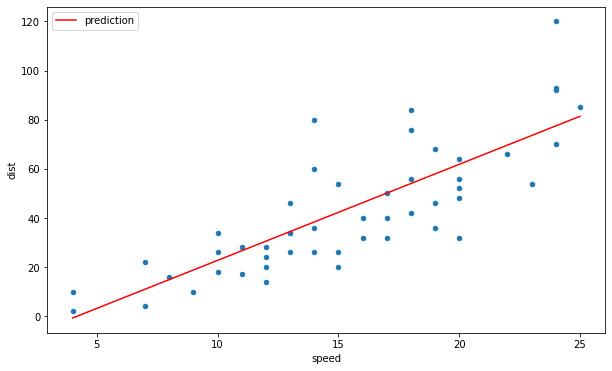

In [23]:
ax= df.plot(kind='scatter',x='speed',y='dist',figsize=(10,6))
df.plot(x='speed',y='prediction',ax=ax,color='red')

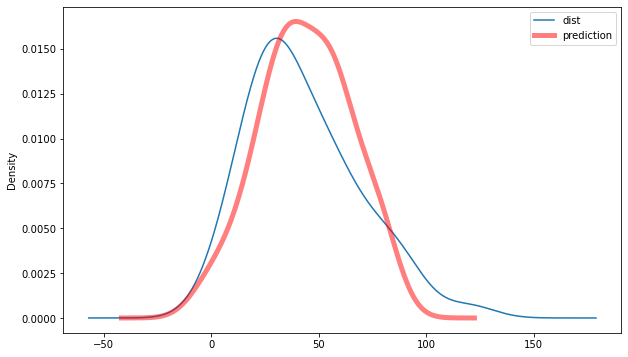

In [12]:
ax = df.plot(kind='kde',x='speed',y='dist',figsize=(10,6))
df.plot(kind='kde',x='speed',y='prediction',ax= ax ,color='red',alpha=.5,linewidth=5)
plt.show()

METRICS

In [13]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [14]:
r2_score(df.dist,df.prediction)

0.6499019845052447

In [15]:
mean_absolute_error(df.dist,df.prediction)

11.680902869492138

In [16]:
mean_squared_error(df.dist,df.prediction)

227.83664648447066

MODEL SAVING

In [17]:
# joblib is a library
from joblib import dump # for dumping the data to a file

In [18]:
dump(reg,"faltu_model_v1.pkl")

['faltu_model_v1.pkl']

LOADING MODEL

In [19]:
from joblib import load

In [20]:
reg = load("faltu_model_v1.pkl")

In [21]:
reg.predict([[23],[54]])

C:\Users\aishw\miniconda3\envs\digi\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 73.56729499, 194.79166166])